In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
#loading data
data_train=pd.read_csv("C:/Users/User/Documents/MachineLearning/MachineLearning/Project/train.csv")
data_test=pd.read_csv("C:/Users/User/Documents/MachineLearning/MachineLearning/Project/test.csv")

# DATA EXPLORATION

In [2]:
training=data_train
testing=data_test

In [3]:
training

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
testing

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Data shows that 38.38% survived

Finding Total Missing values in training dataset

In [7]:
total_null=training.isnull().sum()

Age, Cabin and Embarked Columns have null value

percent of null

In [8]:
Percent_total_train=(total_null/training.isnull().count())*100

In [9]:
Percent_total_train

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [10]:
#19.86 % Age null , maximum null:Cabin=77.10% and negligible null:Embarked=0.22%

In [11]:
total_testnull=testing.isnull().sum()

In [12]:
Percent_total_test=(total_testnull/testing.isnull().count())*100

In [13]:
Percent_total_test

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

Finding Relation of Survived with different features

In [14]:
females=training[training['Sex']=='female']
males=training[training['Sex']=='male']

In [15]:
import numpy as np
import matplotlib.pyplot as plt


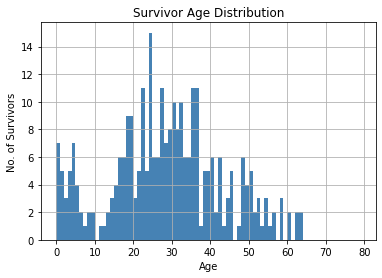

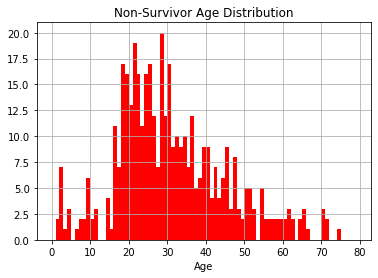

In [16]:
survivedbyage = training[training['Survived'] == 1]
nonsurvivedbyage=training[training['Survived']==0]
survivedbyage['Age'].hist(bins=range(80), color='steelblue', label='Survived')
plt.xlabel('Age')
plt.ylabel('No. of Survivors')
plt.title('Survivor Age Distribution')
plt.show()
nonsurvivedbyage['Age'].hist(bins=range(80), color='red', label='NonSurvived')
plt.title('Non-Survivor Age Distribution')
plt.xlabel('Age')
plt.ylabel
plt.show()

Text(0.5, 1.0, 'Male')

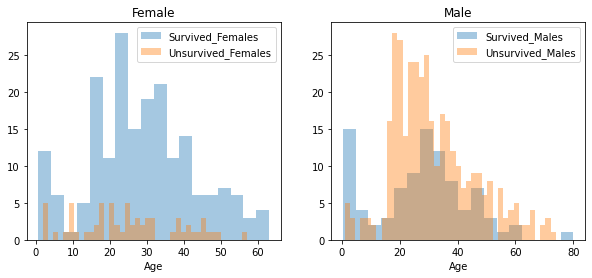

In [17]:
#Survival Rate vs Gender and Age
import seaborn as sns
fig, ax1 = plt.subplots(nrows=1,ncols=2,figsize=(10, 4))
survived_females='Survived_Females'
unsurvived_females='Unsurvived_Females'
survived_males='Survived_Males'
unsurvived_males='Unsurvived_Males'
ax = sns.distplot(females[females['Survived']==1].Age.dropna(), bins=18, label =survived_females , ax = ax1[0],kde=False)
ax = sns.distplot(females[females['Survived']==0].Age.dropna(), bins=40, label =unsurvived_females , ax = ax1[0],kde=False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(males[males['Survived']==1].Age.dropna(), bins=18, label =survived_males , ax = ax1[1],kde=False)
ax = sns.distplot(males[males['Survived']==0].Age.dropna(), bins=40, label =unsurvived_males , ax = ax1[1],kde=False)
ax.legend()
ax.set_title('Male')

From the above Fig., 
Age, Sex Impact on Survived Feature.
Female Survived More as Compared to Male for age group from 15+
while males survive more than female for lower age groups


In [18]:
#Survival Rate For Class
female_survivors=[females['Survived']==1]
female_nonsurvivors=[females['Survived']==0]
male_survivors=[males['Survived']==1]
male_nonsurvivors=[males['Survived']==0]

In [19]:
#plt.bar(training[training['Survived']==1].Pclass,(training['Survived']==1))
(training[training['Survived']==1].Pclass==1).value_counts()

False    206
True     136
Name: Pclass, dtype: int64

In [20]:
(training[training['Survived']==1].Pclass==2).value_counts()

False    255
True      87
Name: Pclass, dtype: int64

In [21]:
(training[training['Survived']==1].Pclass==3).value_counts()

False    223
True     119
Name: Pclass, dtype: int64

In [22]:
##### Survival Rate===Class1(136)>Class3(119)>Class2(87)

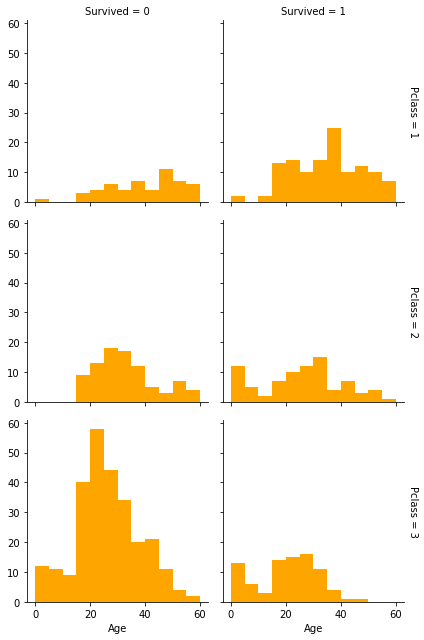

In [23]:
g = sns.FacetGrid(training[pd.notnull(training['Age'])], row="Pclass", col="Survived", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "Age", color="orange", bins=bins)

More deaths for Class 3 passengers

In [24]:
training[training['Survived']==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [25]:
(training[training['Survived']==1].Embarked=='S').value_counts()

True     217
False    125
Name: Embarked, dtype: int64

In [26]:
(training[training['Survived']==1].Embarked=='C').value_counts()

False    249
True      93
Name: Embarked, dtype: int64

In [27]:
(training[training['Survived']==1].Embarked=='Q').value_counts()

False    312
True      30
Name: Embarked, dtype: int64

Survival Rate for S<C<Q

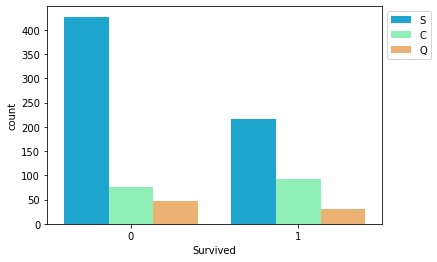

In [28]:
sns.countplot(x = 'Survived', hue = 'Embarked', data = training, palette = 'rainbow')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

In [29]:
###Survival Rate for SibSp and Parch
training['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [30]:
training[training['Survived']==0].SibSp.value_counts()

0    398
1     97
4     15
2     15
3     12
8      7
5      5
Name: SibSp, dtype: int64

In [31]:
training[training['Survived']==1].SibSp.value_counts()

0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64

In [32]:
training['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [33]:
training[training['Survived']==0].Parch.value_counts()

0    445
1     53
2     40
5      4
4      4
3      2
6      1
Name: Parch, dtype: int64

In [34]:
training[training['Survived']==1].Parch.value_counts()

0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64

PLotting for SibSP and Parch for Survival

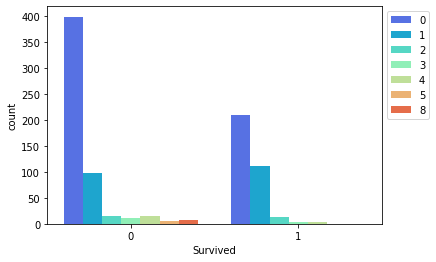

In [35]:
sns.countplot(x = 'Survived', hue = 'SibSp', data = training, palette = 'rainbow')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

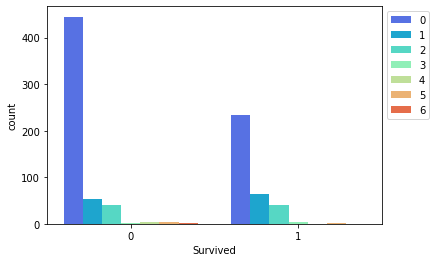

In [36]:
sns.countplot(x = 'Survived', hue = 'Parch', data = training, palette = 'rainbow')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

In [37]:
training['Relations']=training['SibSp']+training['Parch']
testing['Relations']=testing['SibSp']+testing['Parch']

In [38]:
#training['Relations']
training['Relations'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Relations, dtype: int64

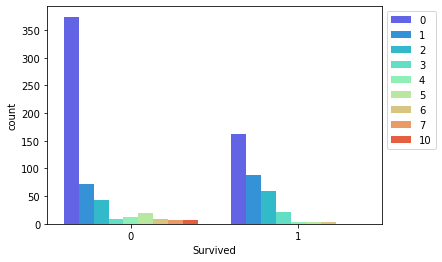

In [39]:
sns.countplot(x = 'Survived', hue = 'Relations', data = training, palette = 'rainbow')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

In [40]:
training[training['Survived']==1].Relations.value_counts()

0    163
1     89
2     59
3     21
6      4
5      3
4      3
Name: Relations, dtype: int64

In [41]:
training[training['Survived']==0].Relations.value_counts()

0     374
1      72
2      43
5      19
4      12
6       8
3       8
10      7
7       6
Name: Relations, dtype: int64

Note: Survival Rates are more for Passengers having 1 to 3 relatives 

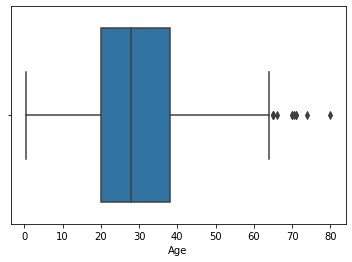

In [42]:
#outlier
sns.boxplot(training['Age'])

# MISSING VALUE IMPUTATION

In [43]:
train_frame=pd.DataFrame(training)
test_frame=pd.DataFrame(testing)

In [44]:
train_frame.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Relations        0
dtype: int64

In [45]:
test_frame.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Relations        0
dtype: int64

In [46]:
training.Age=training.Age.fillna(training.Age.median())####to avoid problem of outliers impact instead of mean we use median


In [47]:
testing.Age=testing.Age.fillna(testing.Age.median())####to avoid problem of outliers impact instead of mean we use median

In [48]:
training['Age'].isna().value_counts()

False    891
Name: Age, dtype: int64

In [49]:
#Converting float to int
training['Age']=training['Age'].astype('int')

In [50]:
testing['Age']=testing['Age'].astype('int')

In [51]:
testing.Fare=testing.Fare.fillna(testing.Fare.median())####to avoid problem of outliers impact instead of mean we use median

In [52]:
testing['Fare']=testing['Fare'].astype('int')

In [53]:
training['Fare']=training['Fare'].astype('int')

In [54]:
#Replacing na values of Embarked column with most common values
training.Embarked=training.Embarked.transform(lambda x: x.fillna(x.mode()[0]))

In [55]:
#Replacing na values of Cabin column with most common values
training.Cabin=training.Cabin.transform(lambda x: x.fillna(x.mode()[0]))

In [56]:
#Replacing na values of Cabin column with most common values
testing.Cabin=testing.Cabin.transform(lambda x: x.fillna(x.mode()[0]))

In [57]:
training.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Relations      0
dtype: int64

In [58]:
training.Ticket.nunique() ###unique value counts 

681

In [59]:
testing.Ticket.nunique() ###unique value counts 

363

# ENCODING AND CREATING DUMMY VARIABLE

In [60]:
#Dummy Variables for Sex
training['Sex']=training['Sex'].astype('category')
training['Sex']=training['Sex'].cat.codes
testing['Sex']=testing['Sex'].astype('category')
testing['Sex']=testing['Sex'].cat.codes

For Encoding converting Object type to Category type

In [61]:
training['Cabin']=training['Cabin'].astype('category')
training['Ticket']=training['Ticket'].astype('category')
training['Embarked']=training['Embarked'].astype('category')
testing['Cabin']=testing['Cabin'].astype('category')
testing['Ticket']=testing['Ticket'].astype('category')
testing['Embarked']=testing['Embarked'].astype('category')

In [62]:
training['Cabin']=training['Cabin'].cat.codes
training['Ticket']=training['Ticket'].cat.codes
training['Embarked']=training['Embarked'].cat.codes
testing['Cabin']=testing['Cabin'].cat.codes
testing['Ticket']=testing['Ticket'].cat.codes
testing['Embarked']=testing['Embarked'].cat.codes

In [63]:
training.dtypes

PassengerId     int64
Survived        int64
Pclass          int64
Name           object
Sex              int8
Age             int32
SibSp           int64
Parch           int64
Ticket          int16
Fare            int32
Cabin           int16
Embarked         int8
Relations       int64
dtype: object

In [64]:
# create a new feature to extract title names from the Name column
training['Title'] = training.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
testing['Title'] = testing.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [65]:
print(training.Title.value_counts())

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Lady              1
Don               1
Mme               1
Capt              1
the Countess      1
Jonkheer          1
Sir               1
Ms                1
Name: Title, dtype: int64


In [66]:
normalise_training_Names={
    "Mr" :"Mr",
"Master":"Master",
"Miss" :"Miss",
"Mrs":"Mrs",
"Mlle": "Miss",
"Mme": "Mrs",
"Ms": "Ms",
 "Sir" :"Royal",
"Lady" :"Royal",
"Don":"Royal",
"the Countess":"Royal",
"Jonkheer" :"Royal",
 "Capt":"Officer" ,
"Col":"Officer",
"Major":"Officer",
"Dr":"Dr",
"Rev":"Officer"
}

In [67]:
normalise_testing_Names={
    "Mr":"Mr",
"Miss" :"Miss",
"Mrs" :"Mrs",
"Master":"Master",
"Col":"Officer" ,
"Rev":"Officer" ,
"Ms":"Ms",
 "Dona":"Royal" ,
"Dr":"Dr"
}

In [68]:
training.Title = training.Title.map(normalise_training_Names)
testing.Title = testing.Title.map(normalise_testing_Names)

In [69]:
training.Name=training.Title
training['Name']=training['Name'].astype('category')
training['Name']=training['Name'].cat.codes
testing.Name=testing.Title
testing['Name']=testing['Name'].astype('category')
testing['Name']=testing['Name'].cat.codes
training['Pclass']=training['Pclass'].astype('category')
training['Pclass']=training['Pclass'].cat.codes
testing['Pclass']=testing['Pclass'].astype('category')
testing['Pclass']=testing['Pclass'].cat.codes


In [70]:
training['Age'].value_counts()

28    204
24     31
22     27
30     27
18     26
     ... 
74      1
66      1
12      1
53      1
80      1
Name: Age, Length: 71, dtype: int64

In [71]:
training=[training]
for data in training:
    data['Age'] = data['Age'].astype(int)
    data.loc[ data['Age'] <= 14, 'Age'] = 0
    data.loc[(data['Age'] > 14) & (data['Age'] <= 25), 'Age'] = 1
    data.loc[(data['Age'] > 25) & (data['Age'] <= 45), 'Age'] = 2
    data.loc[(data['Age'] > 45) & (data['Age'] <= 65), 'Age'] = 3
    data.loc[(data['Age'] > 65) , 'Age'] = 4
    
testing=[testing]
for data1 in testing:
    data1['Age'] = data1['Age'].astype(int)
    data1.loc[ data1['Age'] <= 14, 'Age'] = 0
    data1.loc[(data1['Age'] > 14) & (data1['Age'] <= 25), 'Age'] = 1
    data1.loc[(data1['Age'] > 25) & (data1['Age'] <= 45), 'Age'] = 2
    data1.loc[(data1['Age'] > 45) & (data1['Age'] <= 65), 'Age'] = 3
    data1.loc[(data1['Age'] > 65) , 'Age'] = 4
    

In [72]:
training=[data]
for data in training:
    data['Fare'] = data['Fare'].astype(int)
    data.loc[ data['Fare'] <= 7, 'Fare'] = 0
    data.loc[(data['Fare'] > 7) & (data['Fare'] <= 26), 'Fare'] = 1
    data.loc[(data['Fare'] > 26) & (data['Fare'] <= 38), 'Fare'] = 2
    data.loc[(data['Fare'] > 38) & (data['Fare'] <= 46), 'Fare'] = 3
    data.loc[(data['Fare'] > 46) , 'Fare'] = 4
    
    testing=[data1]
for data1 in testing:
    data1['Fare'] = data1['Fare'].astype(int)
    data1.loc[ data1['Fare'] <= 7, 'Fare'] = 0
    data1.loc[(data1['Fare'] > 7) & (data1['Fare'] <= 26), 'Fare'] = 1
    data1.loc[(data1['Fare'] > 26) & (data1['Fare'] <= 38), 'Fare'] = 2
    data1.loc[(data1['Fare'] > 38) & (data1['Fare'] <= 46), 'Fare'] = 3
    data1.loc[(data1['Fare'] > 46) , 'Fare'] = 4
    

In [73]:
training=[data]
for data in training:
    data['Relations'] = data['Relations'].astype(int)
    data.loc[ data['Relations'] <= 0, 'Relations'] = 0
    data.loc[(data['Relations'] > 0) & (data['Relations'] <= 5), 'Fare'] = 1
    data.loc[(data['Relations'] > 5), 'Relations'] = 2
    
    
    testing=[data1]
for data1 in testing:
    data1['Relations'] = data1['Relations'].astype(int)
    data1.loc[ data1['Relations'] <= 0, 'Relations'] = 0
    data1.loc[(data1['Relations'] > 0) & (data1['Relations'] <= 5), 'Fare'] = 1
    data1.loc[(data1['Relations'] > 5), 'Relations'] = 2
    

In [74]:
training=data
testing=data1

In [75]:
#training=training.drop(['PassengerId'],axis=1)
training=training.drop(['Title'],axis=1)
testing=testing.drop(['Title'],axis=1)


In [76]:
training

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relations
0,1,0,2,3,1,1,1,0,523,1,47,2,1
1,2,1,0,4,0,2,1,0,596,1,81,0,1
2,3,1,2,2,0,2,0,0,669,0,47,2,0
3,4,1,0,4,0,2,1,0,49,1,55,2,1
4,5,0,2,3,1,2,0,0,472,1,47,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,1,6,1,2,0,0,101,1,47,2,0
887,888,1,0,2,0,1,0,0,14,2,30,2,0
888,889,0,2,2,0,2,1,2,675,1,47,2,3
889,890,1,0,3,1,2,0,0,8,2,60,0,0


In [77]:
testing

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relations
0,892,2,3,1,2,0,0,152,0,15,1,0
1,893,2,4,0,3,1,0,221,1,15,2,1
2,894,1,3,1,3,0,0,73,1,15,1,0
3,895,2,3,1,2,0,0,147,1,15,2,0
4,896,2,4,0,1,1,1,138,1,15,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,2,3,1,2,0,0,267,1,15,2,0
414,1306,0,7,0,2,0,0,324,4,22,0,0
415,1307,2,3,1,2,0,0,346,0,15,2,0
416,1308,2,3,1,2,0,0,220,1,15,2,0


COMBINING DATA

In [78]:
target_feature=training['Survived']

In [79]:
training=training.drop(['Survived'],axis=1)
training

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relations
0,1,2,3,1,1,1,0,523,1,47,2,1
1,2,0,4,0,2,1,0,596,1,81,0,1
2,3,2,2,0,2,0,0,669,0,47,2,0
3,4,0,4,0,2,1,0,49,1,55,2,1
4,5,2,3,1,2,0,0,472,1,47,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,1,6,1,2,0,0,101,1,47,2,0
887,888,0,2,0,1,0,0,14,2,30,2,0
888,889,2,2,0,2,1,2,675,1,47,2,3
889,890,0,3,1,2,0,0,8,2,60,0,0


In [80]:
combined_data=training.append(testing,sort=True)
##combined_data=combined_data.drop(['Survived'],axis=1)

In [81]:
#combined_data=combined_data.drop(['index','PassengerId'],axis=1)
combined_data.reset_index(inplace=True)
combined_data

,index,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Relations,Sex,SibSp,Ticket
0,0,1,47,2,1,3,0,1,2,1,1,1,523
1,1,2,81,0,1,4,0,2,0,1,0,1,596
2,2,2,47,2,0,2,0,3,2,0,0,0,669
3,3,2,55,2,1,4,0,4,0,1,0,1,49
4,4,2,47,2,1,3,0,5,2,0,1,0,472
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,413,2,15,2,1,3,0,1305,2,0,1,0,267
1305,414,2,22,0,4,7,0,1306,0,0,0,0,324
1306,415,2,15,2,0,3,0,1307,2,0,1,0,346
1307,416,2,15,2,1,3,0,1308,2,0,1,0,220


In [82]:
combined_data
combined_data.drop(['index', 'PassengerId','Ticket'], inplace=True, axis=1)

In [83]:
combined_data.shape

(1309, 10)

In [84]:
train_data = combined_data.iloc[:891]
test_data = combined_data.iloc[891:]
train_data

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Relations,Sex,SibSp
0,1,47,2,1,3,0,2,1,1,1
1,2,81,0,1,4,0,0,1,0,1
2,2,47,2,0,2,0,2,0,0,0
3,2,55,2,1,4,0,0,1,0,1
4,2,47,2,1,3,0,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...
886,2,47,2,1,6,0,1,0,1,0
887,1,30,2,2,2,0,0,0,0,0
888,2,47,2,1,2,2,2,3,0,1
889,2,60,0,2,3,0,0,0,1,0


In [85]:
test_data

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Relations,Sex,SibSp
891,2,15,1,0,3,0,2,0,1,0
892,3,15,2,1,4,0,2,1,0,1
893,3,15,1,1,3,0,1,0,1,0
894,2,15,2,1,3,0,2,0,1,0
895,1,15,2,1,4,1,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...
1304,2,15,2,1,3,0,2,0,1,0
1305,2,22,0,4,7,0,0,0,0,0
1306,2,15,2,0,3,0,2,0,1,0
1307,2,15,2,1,3,0,2,0,1,0


# FINDING IMPORTANT FEATURES

In [86]:
from sklearn.ensemble import ExtraTreesClassifier

In [87]:
model_reduction = ExtraTreesClassifier(n_estimators=10)
model_reduction.fit(train_data, target_feature)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [88]:
print(model_reduction.feature_importances_)

[0.07036863 0.13183621 0.05143264 0.06806805 0.11904584 0.0311589
 0.12016547 0.05300235 0.30615057 0.04877134]


In [89]:
Reduction_data=pd.DataFrame()

In [90]:
Reduction_data['features']=train_data.columns

In [91]:
##Reduction_data['Important']=model_reduction.feature_importances_
Reduction_data

,features
0,Age
1,Cabin
2,Embarked
3,Fare
4,Name
5,Parch
6,Pclass
7,Relations
8,Sex
9,SibSp


In [92]:
Reduction_data['Important']=model_reduction.feature_importances_

In [93]:
Reduction_data

,features,Important
0,Age,0.070369
1,Cabin,0.131836
2,Embarked,0.051433
3,Fare,0.068068
4,Name,0.119046
5,Parch,0.031159
6,Pclass,0.120165
7,Relations,0.053002
8,Sex,0.306151
9,SibSp,0.048771


In [94]:
Reduction_data.sort_values(by=['Important'], ascending=True, inplace=True)

In [95]:
#Reduction_data.set_index('features', inplace=True)

In [96]:
#Reduction_data.plot(kind=bar,figsize=(25, 25))
plt.figure(figsize=(10,8))

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

[Text(0.5, 1.0, 'FEATURE IMPORTANCE')]

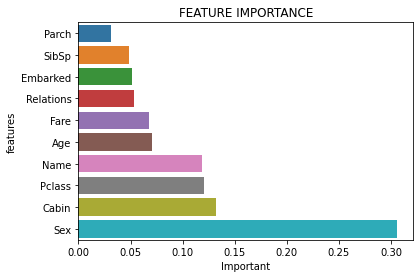

In [97]:
ax=sns.barplot(x=Reduction_data['Important'], y=Reduction_data['features'])
ax.set(title='FEATURE IMPORTANCE')

In [98]:
cols = ["Embarked","Name","Relations","Pclass","Cabin","Sex","Age","Fare"]##["Age","Name","Pclass","Cabin","Sex"]
reduced_traindata=train_data[cols]
reduced_testdata=test_data[cols]
reduced_traindata.shape


(891, 8)

In [99]:
Reduction_data

,features,Important
5,Parch,0.031159
9,SibSp,0.048771
2,Embarked,0.051433
7,Relations,0.053002
3,Fare,0.068068
0,Age,0.070369
4,Name,0.119046
6,Pclass,0.120165
1,Cabin,0.131836
8,Sex,0.306151


In [100]:
reduced_testdata

,Embarked,Name,Relations,Pclass,Cabin,Sex,Age,Fare
891,1,3,0,2,15,1,2,0
892,2,4,1,2,15,0,3,1
893,1,3,0,1,15,1,3,1
894,2,3,0,2,15,1,2,1
895,2,4,2,2,15,0,1,1
...,...,...,...,...,...,...,...,...
1304,2,3,0,2,15,1,2,1
1305,0,7,0,0,22,0,2,4
1306,2,3,0,2,15,1,2,0
1307,2,3,0,2,15,1,2,1


# LOGISTIC REGRESSION MODEL

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [102]:
import random
import numpy as np
init_seed = 0
random.seed(init_seed)
np.random.seed(init_seed)
color1="steelblue"

In [103]:
logreg = LogisticRegression(penalty='l1', solver='liblinear')
logreg.fit(reduced_traindata, target_feature)
y_pred_logreg=logreg.predict(reduced_testdata)

In [104]:
score_logistic = cross_val_score(logreg,reduced_traindata,target_feature, cv =10, scoring='accuracy') ##cv=5
logi=score_logistic.mean()
accuracy=[]
accuracy.append(logi)
accuracy

[0.7980481784133471]

In [105]:
output=pd.DataFrame()
output['Survived_log']=y_pred_logreg
output['Survived_log'].value_counts()

0    280
1    138
Name: Survived_log, dtype: int64

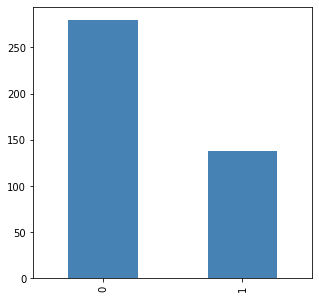

In [106]:
fig = plt.figure(figsize=(5,5)) 

output.Survived_log.value_counts().plot(kind="bar",color=color1)

# KNN CLASSIFIER

In [107]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(reduced_traindata, target_feature)
y_pred_knn=knn.predict(reduced_testdata)

In [108]:
score_KNN = cross_val_score(knn,reduced_traindata,target_feature, cv = 10, scoring='accuracy')
knn_score = score_KNN.mean()
accuracy.append(knn_score)
accuracy

[0.7980481784133471, 0.7777845874475088]

In [109]:
output['Survived_KNN']=y_pred_knn
output['Survived_KNN'].value_counts()

0    219
1    199
Name: Survived_KNN, dtype: int64

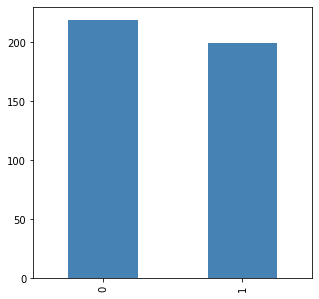

In [110]:
fig = plt.figure(figsize=(5,5)) 

output.Survived_KNN.value_counts().plot(kind="bar",color=color1)

# DECISION TREE

In [111]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier(max_depth = 2, random_state =0,max_leaf_nodes=3)
decisiontree.fit(reduced_traindata, target_feature)
y_pred_DT=decisiontree.predict(reduced_testdata)

In [112]:
score_DT = cross_val_score(decisiontree,reduced_traindata,target_feature, cv = 10, scoring='accuracy')
DT = score_DT.mean()
accuracy.append(DT)
accuracy

[0.7980481784133471, 0.7777845874475088, 0.7733398592668256]

In [113]:
output['Survived_DT']=y_pred_DT
output['Survived_DT'].value_counts()

0    338
1     80
Name: Survived_DT, dtype: int64

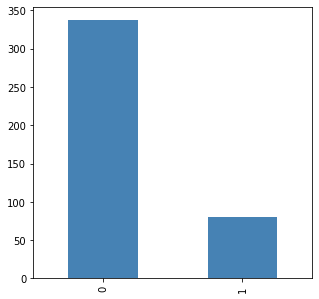

In [114]:
fig = plt.figure(figsize=(5,5)) 
output.Survived_DT.value_counts().plot(kind="bar",color=color1)

# RANDOM FOREST MODEL

In [115]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=50,max_depth = 2,random_state = 0, criterion='entropy')
rf_model.fit(reduced_traindata, target_feature)
y_pred_rf_model=rf_model.predict(reduced_testdata)

In [116]:
score_rf_model = cross_val_score(rf_model,reduced_traindata,target_feature, cv = 10, scoring='accuracy')
rf_score = score_rf_model.mean()
rf_score

0.7969620360912495

In [117]:
accuracy.append(rf_score)
accuracy

[0.7980481784133471,
 0.7777845874475088,
 0.7733398592668256,
 0.7969620360912495]

In [118]:
output['Survived_RF']=y_pred_rf_model
output['Survived_RF'].value_counts()

0    304
1    114
Name: Survived_RF, dtype: int64

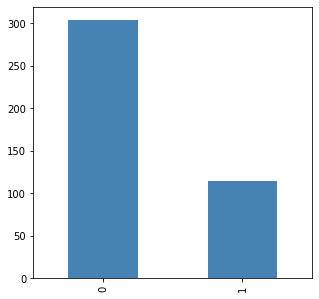

In [119]:
fig = plt.figure(figsize=(5,5)) 

output.Survived_RF.value_counts().plot(kind="bar",color=color1)

# GRADIENT BOOSTING CLASSIFIER

In [120]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=50, learning_rate = 0.1, max_depth = 2, random_state =0,max_leaf_nodes=3 )


In [121]:
gb_model.fit(reduced_traindata, target_feature)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=3,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [122]:
y_pred_gb_model=gb_model.predict(reduced_testdata)
y_pred_gb_model

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [123]:
score_GB_model = cross_val_score(gb_model,reduced_traindata,target_feature, cv = 10, scoring='accuracy')
gb_score=score_GB_model.mean()
gb_score

0.806886278515492

In [124]:
accuracy.append(gb_score)
accuracy

[0.7980481784133471,
 0.7777845874475088,
 0.7733398592668256,
 0.7969620360912495,
 0.806886278515492]

In [125]:
output['Survived_GB']=y_pred_gb_model
output['Survived_GB'].value_counts()

0    249
1    169
Name: Survived_GB, dtype: int64

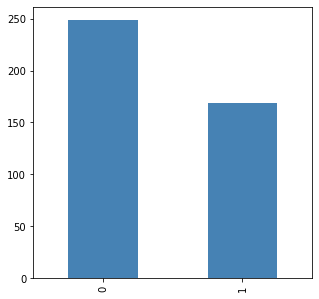

In [126]:
fig = plt.figure(figsize=(5,5)) 

output.Survived_GB.value_counts().plot(kind="bar",color=color1)

# EXTREME GRADIENT BOOSTING

In [127]:
from xgboost import XGBClassifier

In [128]:
XGradient= XGradient = XGBClassifier(learning_rate=0.1,
                      colsample_bytree =0.4,
                      subsample = 1,
                      reg_alpha = 0.3,
                      n_estimators=1000,
                      max_depth=3, gamma=1)


In [129]:
XGradient.fit(reduced_traindata, target_feature)
y_pred_XGradient=XGradient.predict(reduced_testdata)
y_pred_XGradient

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [130]:
score_XG_model = cross_val_score(XGradient,reduced_traindata,target_feature, cv = 10, scoring='accuracy')
xg_score = score_XG_model.mean()
xg_score

0.8306080467597321

In [131]:
accuracy.append(xg_score)
accuracy

[0.7980481784133471,
 0.7777845874475088,
 0.7733398592668256,
 0.7969620360912495,
 0.806886278515492,
 0.8306080467597321]

In [132]:
output['Survived_Xg']=y_pred_XGradient
output['Survived_Xg'].value_counts()

0    247
1    171
Name: Survived_Xg, dtype: int64

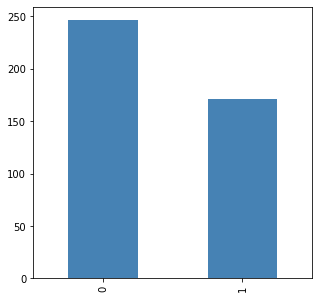

In [133]:
fig = plt.figure(figsize=(5,5)) 
output.Survived_Xg.value_counts().plot(kind="bar",color=color1)

# BAGGING

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]
0    267
1    151
Name: Survived_BaggedDT, dtype: int64
Accuracy is 0.8024691358024691


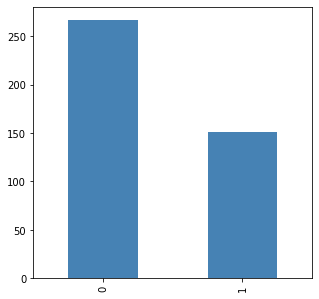

In [134]:
from sklearn.ensemble import BaggingClassifier
bag_model=BaggingClassifier(base_estimator=decisiontree, n_estimators=100, bootstrap=True)
bag_model=bag_model.fit(reduced_traindata, target_feature)
ypred_BaggedDT=bag_model.predict(reduced_testdata)
print(ypred_BaggedDT)
output['Survived_BaggedDT']=ypred_BaggedDT #### added
print(output['Survived_BaggedDT'].value_counts())####added
print("Accuracy is",bag_model.score(reduced_traindata,target_feature))
bagged_score=bag_model.score(reduced_traindata,target_feature)
accuracy.append(bagged_score)
accuracy


fig = plt.figure(figsize=(5,5)) 
output.Survived_BaggedDT.value_counts().plot(kind="bar",color=color1)

# COMPARISON

In [135]:
names = ['LR','DT','KNN','RF','GB','XG','Bagged']

Text(0, 0.5, 'Accuracy')

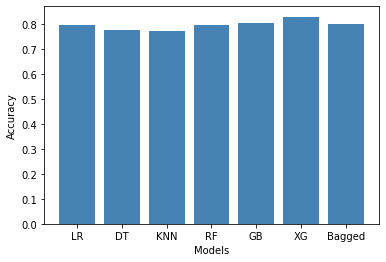

In [149]:
import matplotlib.cm as cm
fig = plt.figure()                                                             
ax = fig.gca()  #get current axes
ax.bar(names, accuracy, align='center', color=color1)
plt.xlabel('Models')
plt.ylabel('Accuracy')


# KAGGLE SCORE TRAJECTORY

In [154]:
scores=[76.076,75.598,78.468,78.947]
approach=('1','2','3','4')

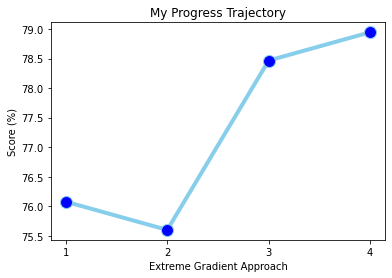

In [156]:
plt.plot(approach,scores,marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.title('My Progress Trajectory')
plt.xlabel('Extreme Gradient Approach')
plt.ylabel('Score (%)')
plt.show()